
<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---

* Họ tên sinh viên: Nguyễn thành long
* Mã sinh viên: 1821050129
* Lớp/Nhóm môn học: DCCTKH63A/ NHÓM 1
* Email: longtc9c2000@gmail.com

---


## B| THỰC HÀNH TRÊN LỚP:
---
Sử dụng dữ liệu đã được tiền xử lý trong tập Data_titanic_ok.csv của chương 2. Xây dựng model học máy dự đoán khả năng không được cứu (0) - được cứu (1) của hành khách:
<img src='Pic/titanic.jpg'>

### B1. Đọc và chuẩn bị dữ liệu

In [1]:
#Đọc tập dữ liệu đã xử lý trong chương 2
import pandas as pd
df_titanic = pd.read_csv('Data/Data_Titanic_ok.csv')
df_titanic.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  1309 non-null   int64
 1   Pclass    1309 non-null   int64
 2   Sex       1309 non-null   int64
 3   Age       1309 non-null   int64
 4   SibSp     1309 non-null   int64
 5   Parch     1309 non-null   int64
 6   Embarked  1309 non-null   int64
dtypes: int64(7)
memory usage: 71.7 KB


In [2]:
#Hiển thị 5 dòng dữ liệu đầu tiên - cuối cùng của Dataset
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1
2,1,3,1,1,0,0,0
3,1,1,1,2,1,0,0
4,0,3,0,2,0,0,0


In [4]:
df_titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1304,0,3,0,1,0,0,0
1305,1,1,1,2,0,0,1
1306,0,3,0,2,0,0,0
1307,0,3,0,1,0,0,0
1308,0,3,0,1,1,1,1


In [5]:
#Tách biến độc lập - biến phụ thuộc
#1.Tách biến độc lập X_titanic
X_titanic = df_titanic.iloc[:,1:].values
X_titanic



array([[3, 0, 1, 1, 0, 0],
       [1, 1, 2, 1, 0, 1],
       [3, 1, 1, 0, 0, 0],
       ...,
       [3, 0, 2, 0, 0, 0],
       [3, 0, 1, 0, 0, 0],
       [3, 0, 1, 1, 1, 1]], dtype=int64)

In [7]:
#2.Tách biến phu thuoc y_titanic
y_titanic = df_titanic.iloc[:,0].values
y_titanic



array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [8]:
#Tách thành tập Train-Test theo tỷ lệ 75-25:
from sklearn.model_selection import train_test_split

X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic, y_titanic,test_size=0.25,random_state=42)

print('Kich thuoc tap train:',X_titanic_train.shape)
print('Kich thuoc tap train:',X_titanic_test.shape)


Kich thuoc tap train: (981, 6)
Kich thuoc tap train: (328, 6)


### B.2 Xây dựng và đánh giá Model

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

#Xây dựng model và huấn luyện:
from sklearn.tree import DecisionTreeClassifier


#Khai báo model với các tham số mặc định:
model_titanic = DecisionTreeClassifier()


#Huấn luyện model với tập Train:
model_titanic.fit(X_titanic_train,y_titanic_train)


#Độ chính xác của Model trên tập Huấn luyện
print('Do chinh xac cua tap huan luyen:',round(model_titanic.score(X_titanic_train,y_titanic_train)*100,2))

Do chinh xac cua tap huan luyen: 89.91


In [10]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [11]:
features_name = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
target_name = ['0 :Died','1: Living']

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
[0.07444652 0.71268062 0.04378054 0.06717145 0.06531102 0.03660985]


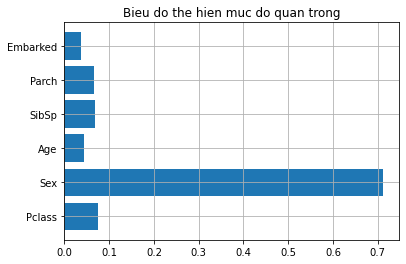

In [14]:
#Xác định mức độ quan trọng của các feature:
print(features_name)
print(model_titanic.feature_importances_)


#Trực quan hóa các thuộc tính quan trọng
plt.barh(features_name, model_titanic.feature_importances_)
plt.title('Bieu do the hien muc do quan trong')
plt.grid(True)
plt.show()






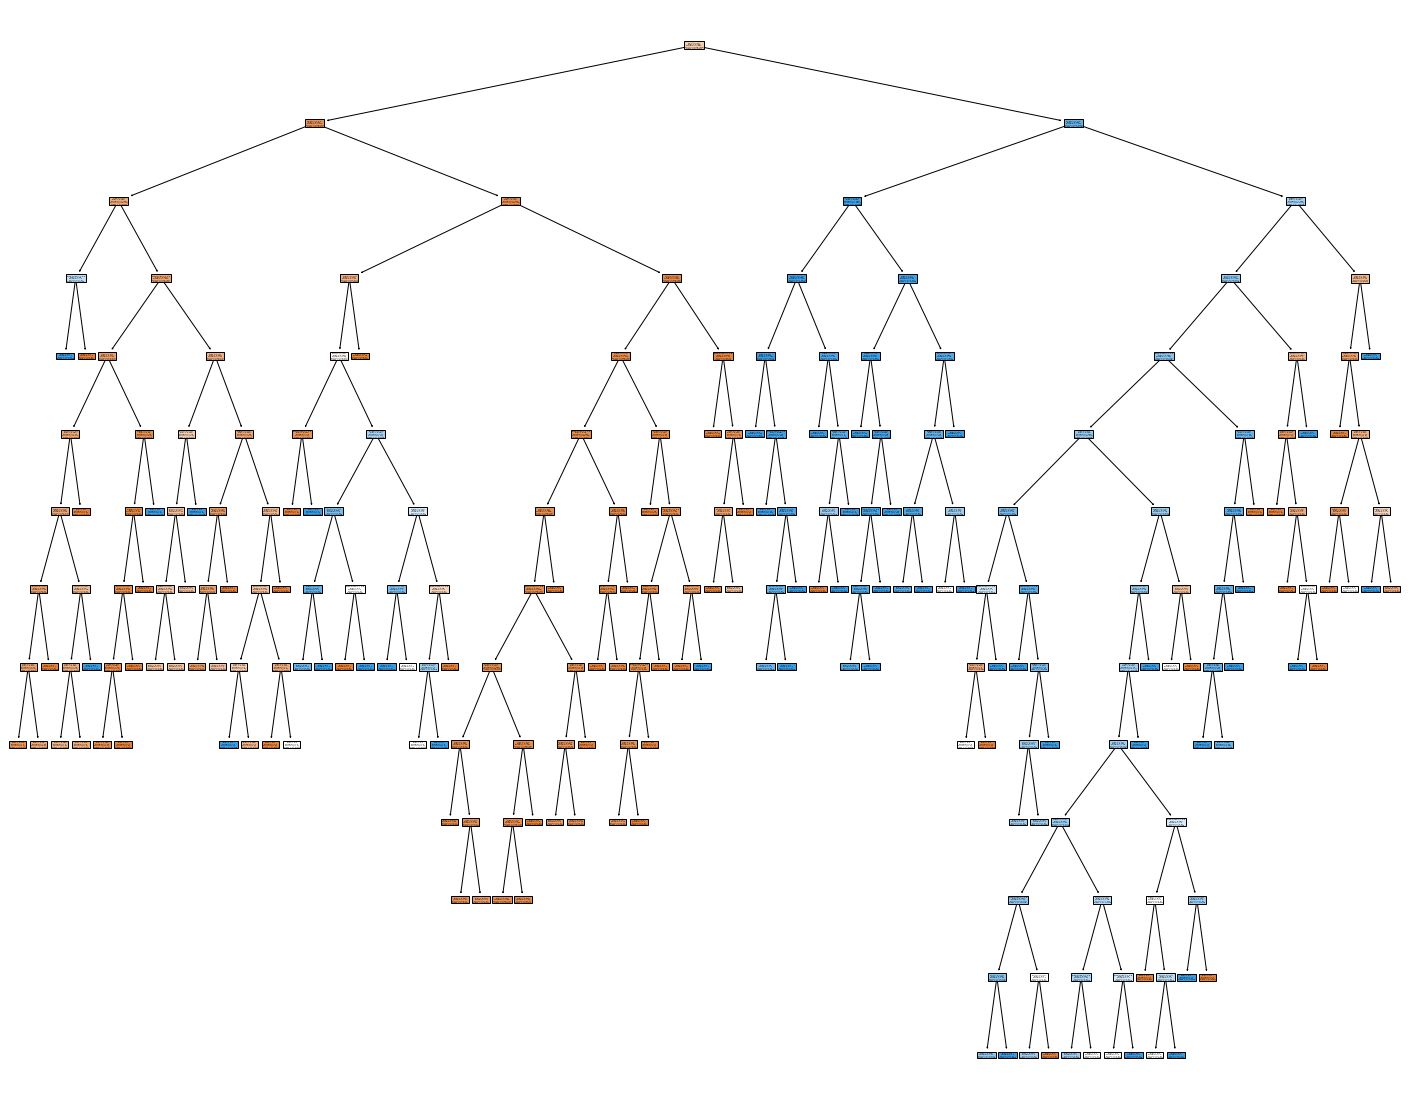

In [15]:
#Trực quan hóa cây quyết định đã huấn luyện được:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model_titanic,
              feature_names= features_name,
              class_names= target_name,
              filled=True)
plt.show()



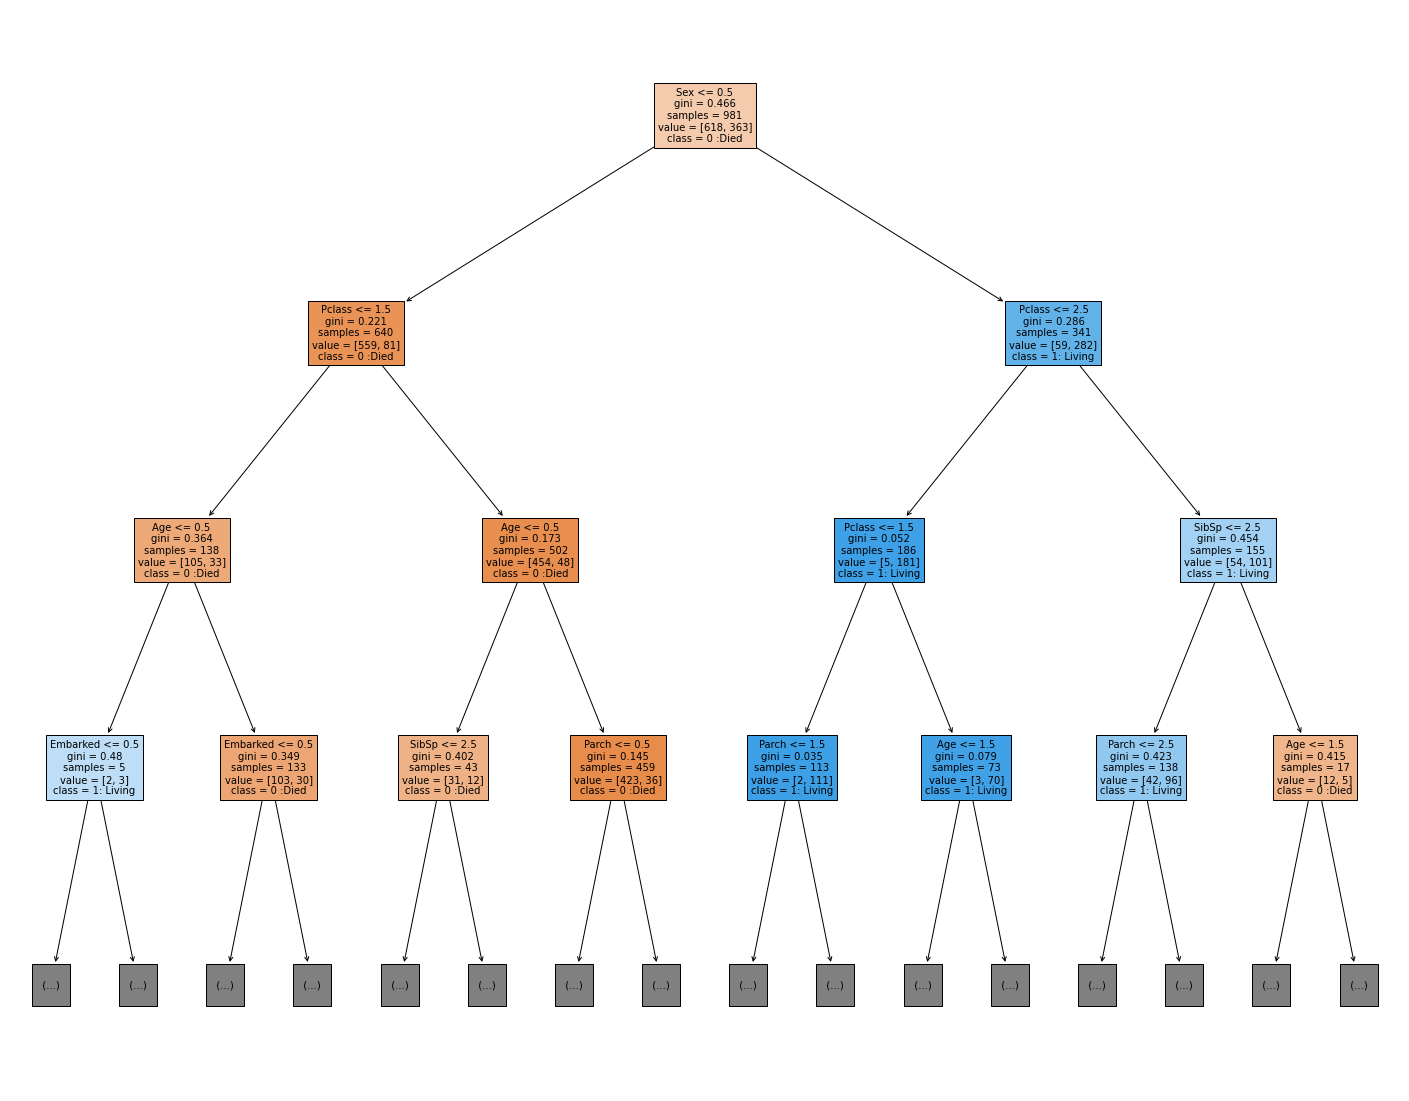

In [16]:
#View cây với độ sâu = 3
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model_titanic,
              feature_names= features_name,
              class_names= target_name,
               max_depth=3, fontsize=10,
              filled=True)
plt.show()



In [17]:
#Xác định độ sâu của cây: Khoảng cách tối đa giữa gốc và lá
print('Do sau cay:', model_titanic.get_depth())


#Xác định số lượng nút lá của cây quyết định:
print('So nut la', model_titanic.get_n_leaves())


Do sau cay: 13
So nut la 121


In [18]:
#Phân loại hành khách được cứu| không được cứu trên tập kiểm thử
y_titanic_pred= model_titanic.predict(X_titanic_test)

print('Hien thi ket qua du doan 40 hanh khach dau tien:')
print('Mo hinh du doan', y_titanic_pred[:40])
print('Groud Truth:' ,y_titanic_test[:40])




Hien thi ket qua du doan 40 hanh khach dau tien:
Mo hinh du doan [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1
 0 0 0]
Groud Truth: [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1
 0 0 1]


In [19]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_titanic_test,y_titanic_pred)
acc1_num= accuracy_score(y_titanic_test,y_titanic_pred, normalize=False)
print('Do chinh xac:',round(acc1*100,2))
print('Tong so mau du doan dung:',acc1_num,'/',len(y_titanic_pred))


Do chinh xac: 82.01
Tong so mau du doan dung: 269 / 328


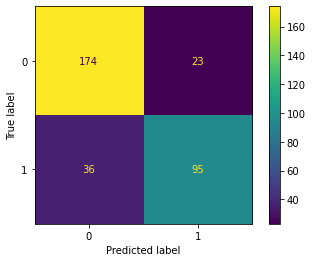

In [20]:
#Hiển thị confusion matrix:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_titanic, X_titanic_test, y_titanic_test)  
plt.show()


### B.3 Thay đổi tham số của model Titanic, đánh giá độ chính xác:
---
Sinh viên thay đổi các tham số của model để thu được độ chính xác cao hơn.

In [21]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
model_titanic  = DecisionTreeClassifier(criterion= 'entropy', 
                                     splitter='random', 
                                     max_features = 2,
                                     random_state=1)

model_titanic.get_params()



{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 2,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'random'}

In [22]:
# Huấn luyên mô hình với dữ liệu huấn luyện
model_titanic.fit(X_titanic_train, y_titanic_train)

print("Độ chính xác của tập huấn luyện:",round(model_titanic.score(X_titanic_train, y_titanic_train)*100,2))

Độ chính xác của tập huấn luyện: 89.91


[0.11263271 0.61371485 0.06188677 0.1041733  0.07595455 0.03163783]


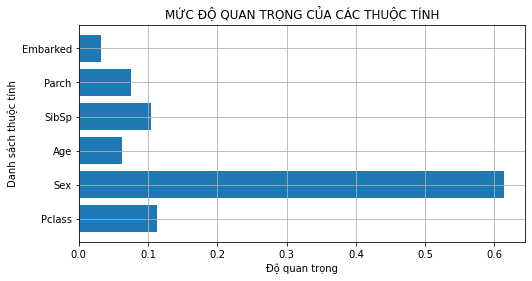

In [23]:
#Xác định mức độ quan trọng của các feature
print(model_titanic.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(features_name,model_titanic.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THUỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

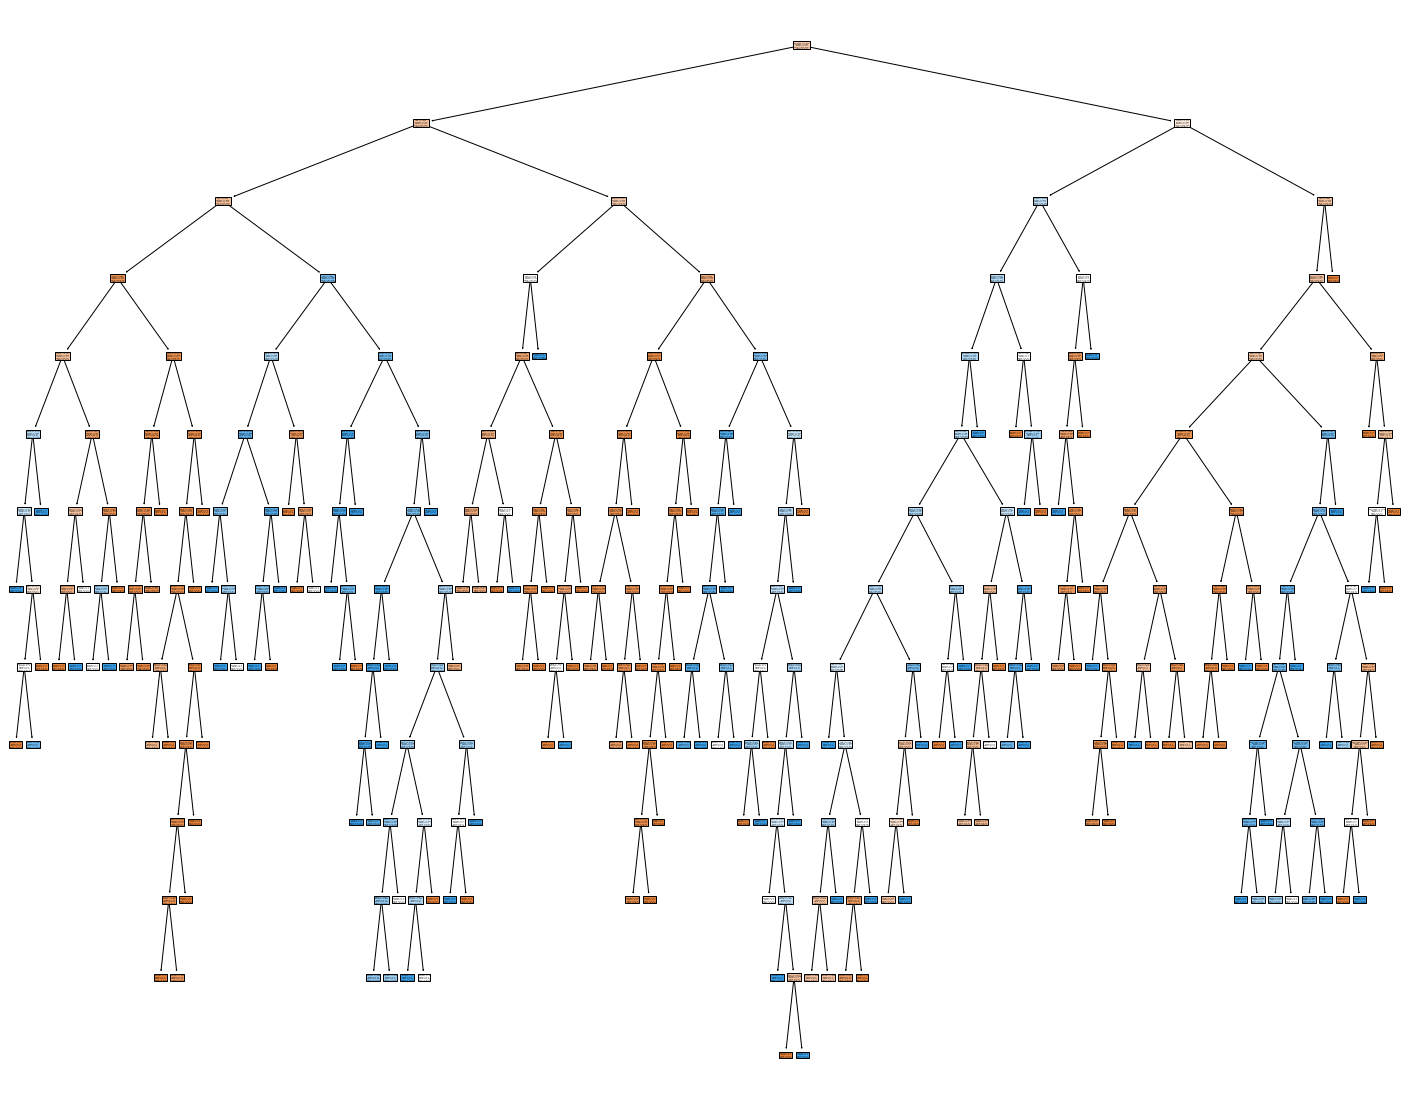

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

tree.plot_tree(model_titanic, 
                    feature_names= features_name,  
                   class_names=target_name,
                   filled=True)
plt.show()

In [25]:
#Xác định độ sâu của cây: Khoảng cách tối đa giữa gốc và lá
print('Độ sâu của cây quyết định:',
      model_titanic.get_depth())

#Xác định số lượng nút lá của cây quyết định:
print('Số nút lá của cây quyết định:',
      model_titanic.get_n_leaves())

Độ sâu của cây quyết định: 13
Số nút lá của cây quyết định: 158


In [26]:
#Phân loại hoa lan trên tập kiểm thử
y_pred1 = model_titanic.predict(X_titanic_test)

print("Kết quả phân loại hoa lan trên tập dữ liệu TEST:")
print("Predicted labels: ", y_titanic_pred)
print("Ground truth    : ", y_titanic_test)

Kết quả phân loại hoa lan trên tập dữ liệu TEST:
Predicted labels:  [0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0
 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1]
Ground truth    :  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1
 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0
 1 1 0 1 0 1 0 0 0 0 1

In [27]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_titanic_test, y_titanic_pred)
acc1_num = accuracy_score(y_titanic_test, y_titanic_pred, normalize=False)
print("Độ chính xác đạt:", round(acc1*100,2))
print("Tổng số mẫu dự đoán đúng:",acc1_num, '/', len(y_titanic_test))

Độ chính xác đạt: 82.01
Tổng số mẫu dự đoán đúng: 269 / 328


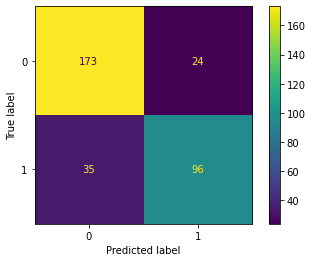

In [28]:
#Hiển thị confusion matrix:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_titanic, X_titanic_test, y_titanic_test)  
plt.show()

# THỰC HÀNH SỐ 7: THUẬT TOÁN DECISION TREE
---
Sử dụng thuật toán Decision tree phân loại rượu dựa vào các thống số liên quan

* Tìm hiểu tập dữ liệu mẫu "Wine recognition dataset" của Sklearn
    - Các biến độc lập (input - features)
    - Biến phụ thuộc  (label - target)
<img src='pic/win1.png' width='250px'>
* Áp dụng thuật toán Decision để phân loại rượu
    - Tách tập dữ liệu theo tỷ lệ 75% cho tập huấn luyện - 25% cho tập kiểm tra
 
* Sử dụng thuật toán Cây quyết định  trong 2 trường hợp:
    * Sử dụng độ đo Entropy: Trực quan hóa cây quyết định thu được trên tập Huấn luyện, xác định thuộc tính quan trọng và vẽ biểu đồ; xác định độ chính xác của mô hình trên tập Test.
    * Sử dụng độ đo Gini: Trực quan hóa cây quyết định thu được trên tập Huấn luyện, xác định thuộc tính quan trọng và vẽ biểu đồ; xác định độ chính xác của mô hình trên tập Test.
    
* Một mẫu rượu có các tham số như sau:
     * Alcohol				: 12.7	
     * Malic acid			: 3.05
     * Ash		    		: 1.88
     * Alcalinity of ash	: 28.8
     * Magnesium			: 101.1
     * Total phenols		: 2.88
     * Flavanoids			: 3.88
     * Nonflavanoid phenols	: 0.44
     * Proanthocyanins		: 2.88
     * Color intensity		: 8.8
     * Hue				    : 1.48
     * OD280/OD315 of diluted wines	: 3.88
     * Proline              :888
     
     Sử dụng model có độ chính xác cao nhất thu được ở yêu cầu 3, cho biết mẫu rượu này thuộc loại nào?

In [29]:
#Đọc dữ liệu mẫu Wine từ sklearn
#Đọc tập dữ liệu Wine Dataset
from sklearn.datasets import load_wine
#Đọc dữ liệu trả về biến array
X_wine, y_wine = load_wine(return_X_y=True)

print(type(X_wine))
print('Kích thước dữ liệu đầu vào (features):', X_wine.shape)
print('Kích thước dữ liệu đầu ra (target)   :', y_wine.shape)
print('Bộ dữ liệu 1)  ', X_wine[1,:], '--',y_wine[1])
print('Bộ dữ liệu 55) ', X_wine[55,:], '--',y_wine[55])
print('Bộ dữ liệu 110)', X_wine[111,:], '--',y_wine[110])


<class 'numpy.ndarray'>
Kích thước dữ liệu đầu vào (features): (178, 13)
Kích thước dữ liệu đầu ra (target)   : (178,)
Bộ dữ liệu 1)   [1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03] -- 0
Bộ dữ liệu 55)  [1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
 2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03] -- 0
Bộ dữ liệu 110) [1.252e+01 2.430e+00 2.170e+00 2.100e+01 8.800e+01 2.550e+00 2.270e+00
 2.600e-01 1.220e+00 2.000e+00 9.000e-01 2.780e+00 3.250e+02] -- 1


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, 
                                                    test_size=0.2, 
                                                    random_state=50)

print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 142
2. Kích thước tập Test    : 36


In [31]:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier

#Khai báo model Decision Tree sử dụng các tham số mặc định
model_tree = DecisionTreeClassifier()

#Các tham số của model DecisionTree
print('DANH SÁC CÁC THAM SỐ CỦA MODEL:')
model_tree.get_params()

DANH SÁC CÁC THAM SỐ CỦA MODEL:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
# Huấn luyên mô hình với dữ liệu huấn luyện
model_tree.fit(X_train, y_train)

print("Độ chính xác của tập huấn luyện:",round(model_tree.score(X_train, y_train)*100,2))

Độ chính xác của tập huấn luyện: 100.0


### TRỰC QUAN HÓA CÂY QUYẾT ĐỊNH

In [33]:
#Đặt tên cho các thuộc tính và các lớp hoa iris:
feature_names = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
target_names = ['class_0', 'class_1', 'class_2']

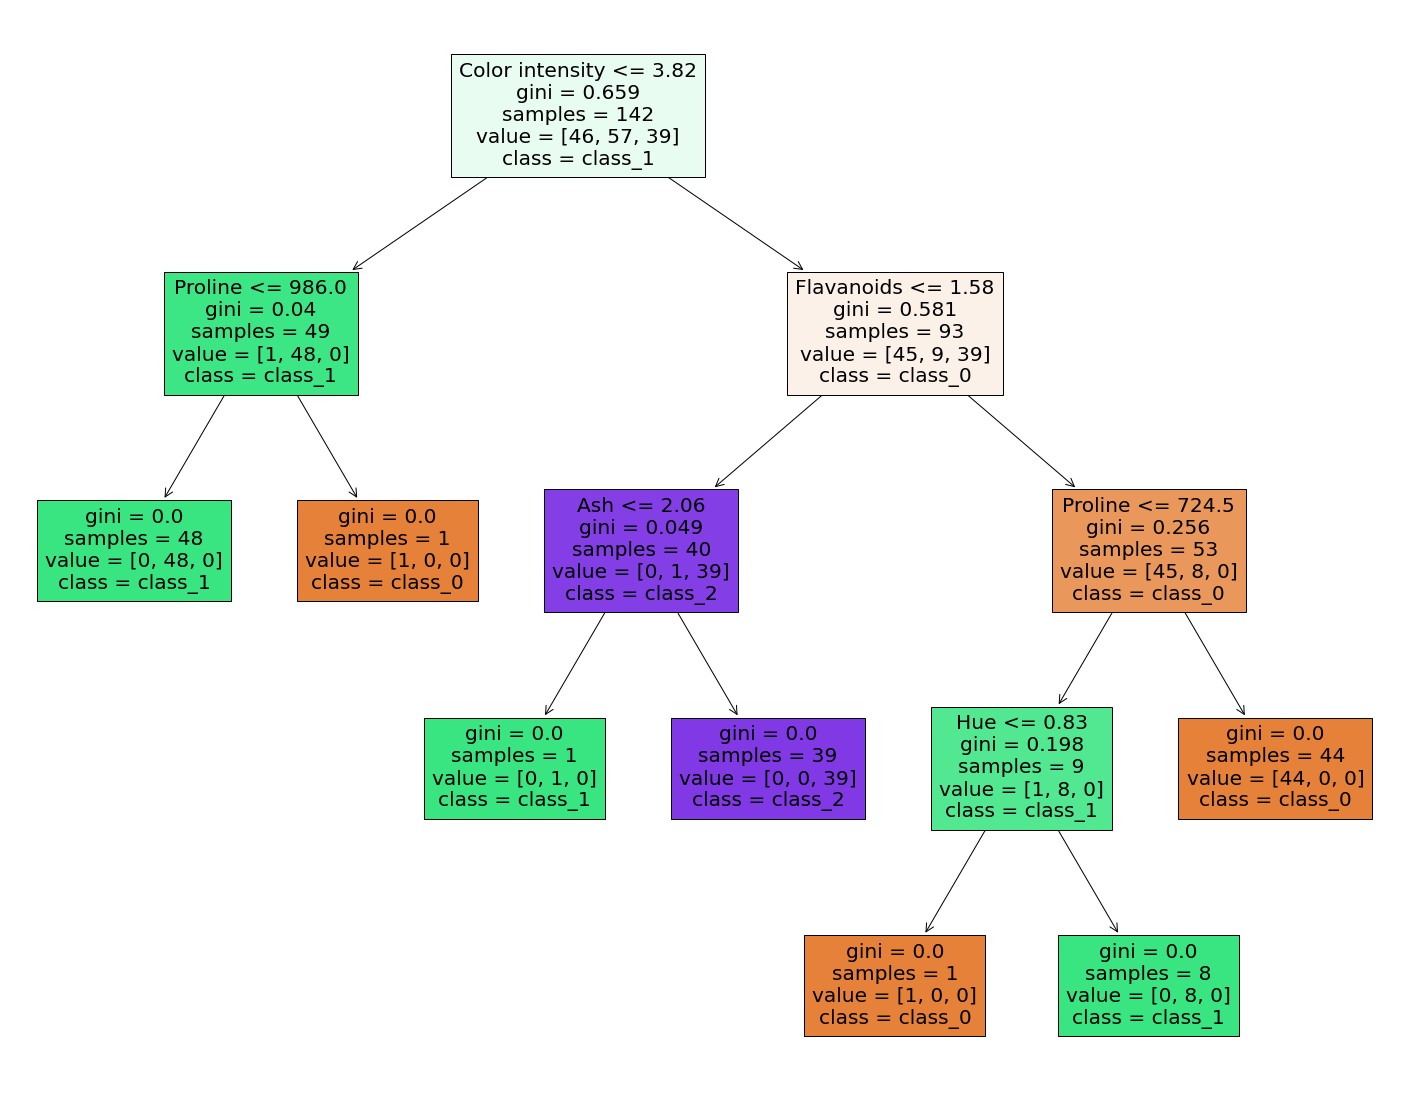

In [35]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

tree.plot_tree(model_tree, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)
plt.show()

[0.         0.         0.02085404 0.         0.         0.
 0.4113604  0.         0.         0.40155113 0.01901223 0.
 0.14722219]


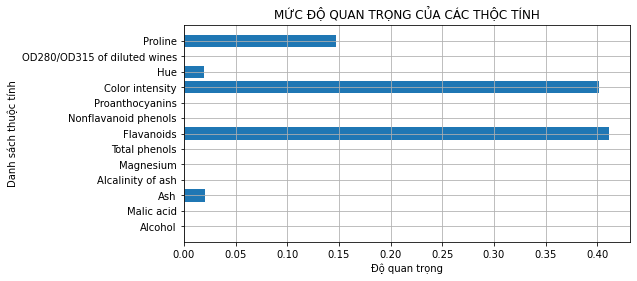

In [36]:
#Xác định mức độ quan trọng của các feature
print(model_tree.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,model_tree.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [37]:
#Xác định độ sâu của cây: Khoảng cách tối đa giữa gốc và lá
print('Độ sâu của cây quyết định:',
      model_tree.get_depth())

Độ sâu của cây quyết định: 4


In [38]:
#Xác định số lượng nút lá của cây quyết định:
print('Số nút lá của cây quyết định:',
      model_tree.get_n_leaves())

Số nút lá của cây quyết định: 7


## Áp dụng model trên tập kiểm thử:
---

In [39]:
#Phân loại rượu trên tập kiểm thử
y_pred = model_tree.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [1 1 1 2 2 2 1 1 1 2 0 1 1 0 1 2 1 2 1 0 0 0 0 2 0 0 1 1 0 1 0 0 2 2 0 1]
Ground truth    :  [1 1 1 2 2 2 1 1 0 2 0 0 1 0 1 2 1 2 1 0 0 1 0 2 0 0 1 1 0 1 0 0 2 2 0 1]


In [40]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc_num = accuracy_score(y_test, y_pred, normalize=False)
print("Độ chính xác đạt:", round(acc*100,2))
print("Tổng số mẫu dự đoán đúng:",acc_num, '/', len(y_test))

Độ chính xác đạt: 91.67
Tổng số mẫu dự đoán đúng: 33 / 36


## Thay đổi tham số của mô hình
---


In [41]:
model_tree1  = DecisionTreeClassifier(criterion= 'entropy', 
                                     splitter='random', 
                                     max_features = 3,
                                     random_state=1)

model_tree1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'random'}

In [42]:
# Huấn luyên mô hình với dữ liệu huấn luyện
model_tree1.fit(X_train, y_train)

print("Độ chính xác của tập huấn luyện:",round(model_tree1.score(X_train, y_train)*100,2))

Độ chính xác của tập huấn luyện: 100.0


[0.14949487 0.03136624 0.00962242 0.03318804 0.00898574 0.01907257
 0.41972665 0.018546   0.04471524 0.02255219 0.01237735 0.0536997
 0.17665299]


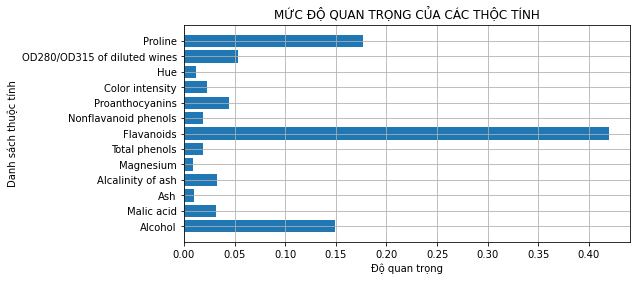

In [43]:
#Xác định mức độ quan trọng của các feature
print(model_tree1.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,model_tree1.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

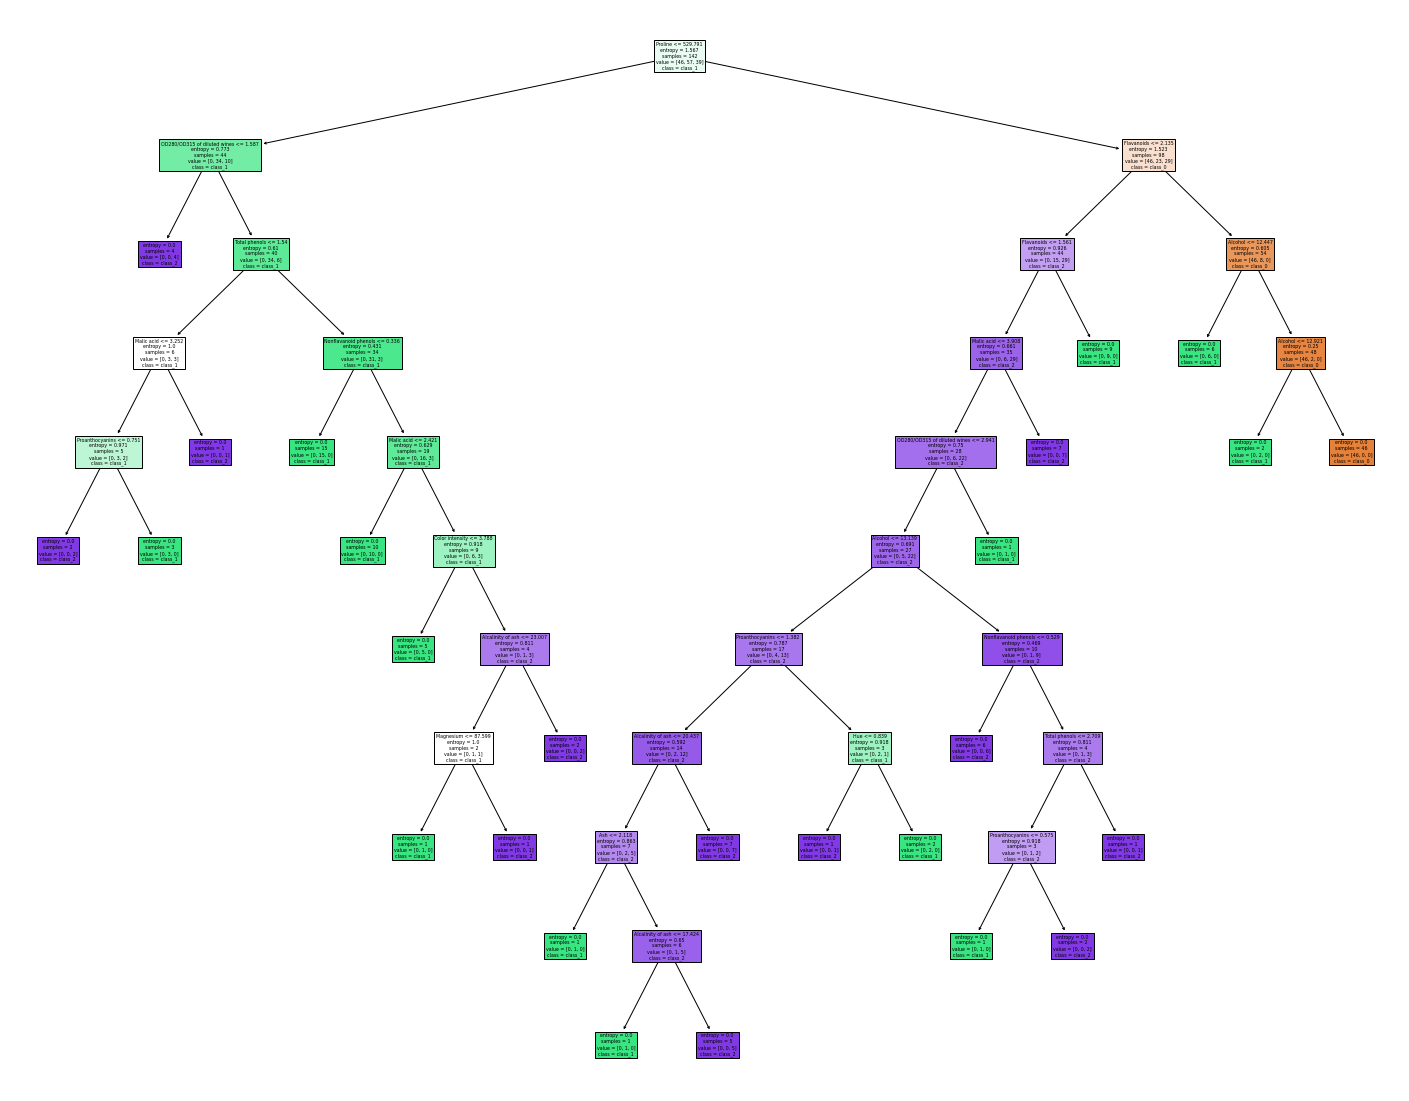

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

tree.plot_tree(model_tree1, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)
plt.show()

In [45]:
#Xác định độ sâu của cây: Khoảng cách tối đa giữa gốc và lá
print('Độ sâu của cây quyết định:',
      model_tree1.get_depth())

#Xác định số lượng nút lá của cây quyết định:
print('Số nút lá của cây quyết định:',
      model_tree1.get_n_leaves())

Độ sâu của cây quyết định: 10
Số nút lá của cây quyết định: 26


In [46]:
#Phân loại hoa lan trên tập kiểm thử
y_pred1 = model_tree1.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred1)
print("Ground truth    : ", y_test)

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [1 1 1 2 2 2 1 1 0 2 0 0 1 0 1 2 1 2 1 0 1 1 0 2 0 0 1 0 0 1 0 0 2 2 0 1]
Ground truth    :  [1 1 1 2 2 2 1 1 0 2 0 0 1 0 1 2 1 2 1 0 0 1 0 2 0 0 1 1 0 1 0 0 2 2 0 1]


In [47]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred1)
acc1_num = accuracy_score(y_test, y_pred1, normalize=False)
print("Độ chính xác đạt:", round(acc1*100,2))
print("Tổng số mẫu dự đoán đúng:",acc1_num, '/', len(y_test))

Độ chính xác đạt: 94.44
Tổng số mẫu dự đoán đúng: 34 / 36


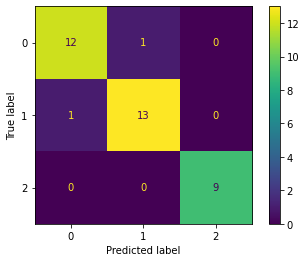

In [48]:
#Hiển thị confusion matrix:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_tree1, X_test, y_test)  
plt.show()